In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing

# Loading the data

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
testdata = pd.read_csv("test.csv")
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Encoder

In [4]:
lencode=LabelEncoder()

## The function below performs preprocessing on the numerical features: it first checks for empty values, if found, it will replace them with the mean value. Then it will normalize the values between 0 and 1

In [5]:
def numerical_pre(train,feature):
    if train[feature].isnull().sum() > 0:
        train[feature] = train[feature].fillna(train[feature].mean())
    train[feature] = (train[feature]-train[feature].min())/(train[feature].max()-train[feature].min())
    return train[feature]

## The function below performs preprocessing on the categorical features: it first checks for empty values, if found it will replace the 'Na' value with 'unkown',then  it will perform label encoder(one hot encoding ) to convert those values into numbers the model can understand.

In [6]:
# 
def catergocial_pre(train,feature):
    if train[feature].isnull().sum() > 0:
        train[feature] = train[feature].fillna('unkown')
    for i in train[feature]:
        train[feature] = lencode.fit_transform(train[feature])
    return train[feature]

In [7]:
categorical = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [8]:
numerical = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

In [14]:
for i in categorical:
    train[i]= catergocial_pre(train,i)

In [15]:
for i in numerical:
    train[i]= numerical_pre(train,i)

In [16]:
train=train.drop(['Id'],axis=1)

In [17]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,0.150685,0.033420,1,2,3,3,0,4,...,0.0,3,4,4,0.0,0.090909,0.50,8,4,0.241078
1,0,3,0.202055,0.038795,1,2,3,3,0,2,...,0.0,3,4,4,0.0,0.363636,0.25,8,4,0.203583
2,5,3,0.160959,0.046507,1,2,0,3,0,4,...,0.0,3,4,4,0.0,0.727273,0.50,8,4,0.261908
3,6,3,0.133562,0.038561,1,2,0,3,0,0,...,0.0,3,4,4,0.0,0.090909,0.00,8,0,0.145952
4,5,3,0.215753,0.060576,1,2,0,3,0,2,...,0.0,3,4,4,0.0,1.000000,0.50,8,4,0.298709


# the function below is for removing outliers

In [18]:
def remove_outl(df, col):
    quantile1 = df[col].quantile(0.25)
    quantile3 = df[col].quantile(0.75)
    idiff = quantile3-quantile1 
    fence_low  = quantile1-1.5*idiff
    fence_high = quantile3+1.5*idiff
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

In [19]:
train.shape

(1460, 80)

In [20]:
train=remove_outl(train,'SalePrice')

In [21]:
train.shape

(1399, 80)

In [22]:
testdata.shape

(1459, 80)

In [23]:
testdata=remove_outl(testdata,'GrLivArea')

In [24]:
testdata.shape

(1415, 80)

# Preprocessing for Test.CSV

In [25]:
testing_categorical = categorical

In [26]:
testing_numerical = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [27]:
for i in testing_categorical:
    testdata[i]= catergocial_pre(testdata,i)

In [28]:
for i in testing_numerical:
    testdata[i]= numerical_pre(testdata,i)

In [29]:
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,0.329609,0.184147,1,2,3,3,0,...,0.208333,0.0,1,2,3,0.0,0.454545,1.0,8,4
1,1462,0,3,0.335196,0.232124,1,2,0,3,0,...,0.000000,0.0,1,4,0,1.0,0.454545,1.0,8,4
2,1463,5,3,0.296089,0.224197,1,2,0,3,0,...,0.000000,0.0,1,2,3,0.0,0.181818,1.0,8,4
3,1464,5,3,0.318436,0.154326,1,2,0,3,0,...,0.000000,0.0,1,4,3,0.0,0.454545,1.0,8,4
4,1465,11,3,0.122905,0.064121,1,2,0,1,0,...,0.250000,0.0,1,4,3,0.0,0.000000,1.0,8,4


In [30]:
testdata=testdata.drop(['Id'],axis=1)

# Dividing features and target variables

In [31]:
import seaborn as sns
y =train['SalePrice'] 
y

0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
          ...   
1455    0.194556
1456    0.243161
1457    0.321622
1458    0.148903
1459    0.156367
Name: SalePrice, Length: 1399, dtype: float64

In [32]:
X = train.drop(['SalePrice'],axis=1)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,0.150685,0.033420,1,2,3,3,0,4,...,0.0,0.0,3,4,4,0.00000,0.090909,0.50,8,4
1,0,3,0.202055,0.038795,1,2,3,3,0,2,...,0.0,0.0,3,4,4,0.00000,0.363636,0.25,8,4
2,5,3,0.160959,0.046507,1,2,0,3,0,4,...,0.0,0.0,3,4,4,0.00000,0.727273,0.50,8,4
3,6,3,0.133562,0.038561,1,2,0,3,0,0,...,0.0,0.0,3,4,4,0.00000,0.090909,0.00,8,0
4,5,3,0.215753,0.060576,1,2,0,3,0,2,...,0.0,0.0,3,4,4,0.00000,1.000000,0.50,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,0.140411,0.030929,1,2,3,3,0,4,...,0.0,0.0,3,4,4,0.00000,0.636364,0.25,8,4
1456,0,3,0.219178,0.055505,1,2,3,3,0,4,...,0.0,0.0,3,2,4,0.00000,0.090909,1.00,8,4
1457,6,3,0.154110,0.036187,1,2,3,3,0,4,...,0.0,0.0,3,0,2,0.16129,0.363636,1.00,8,4
1458,0,3,0.160959,0.039342,1,2,3,3,0,4,...,0.0,0.0,3,4,4,0.00000,0.272727,1.00,8,4


## Plotting Categorical features vs Target Variable

C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


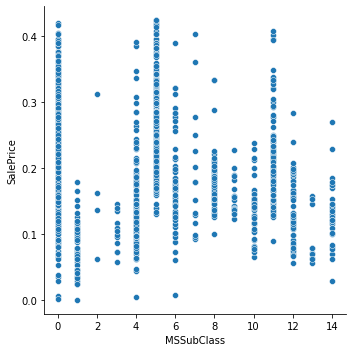

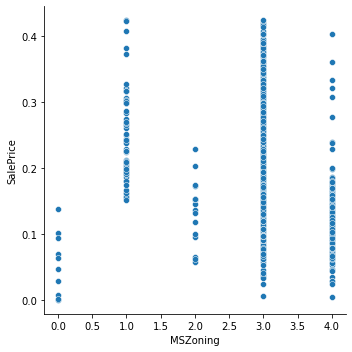

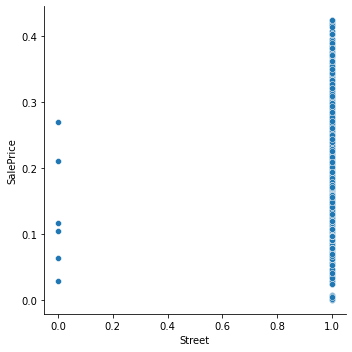

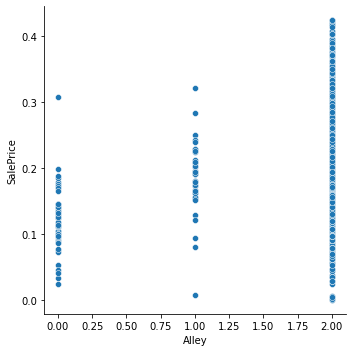

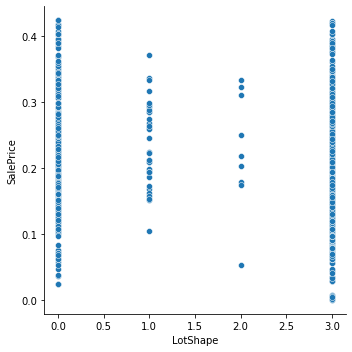

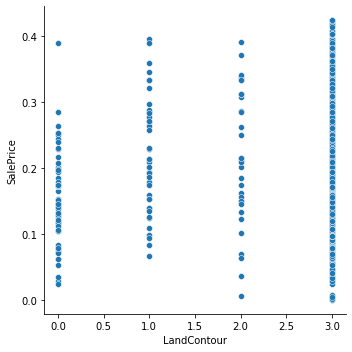

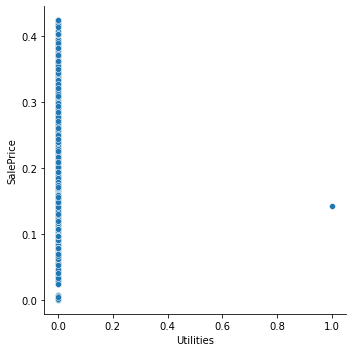

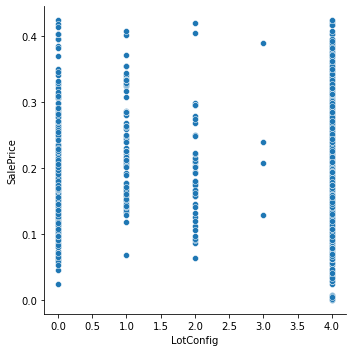

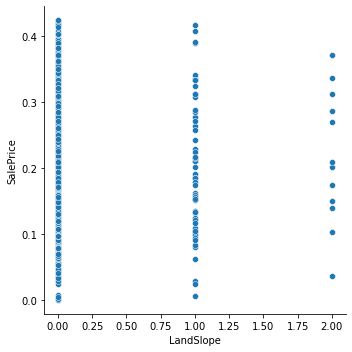

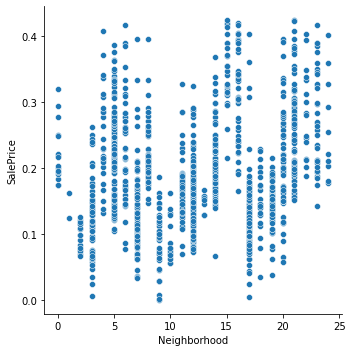

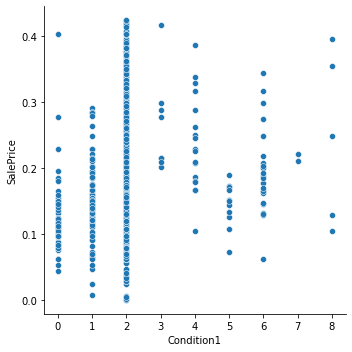

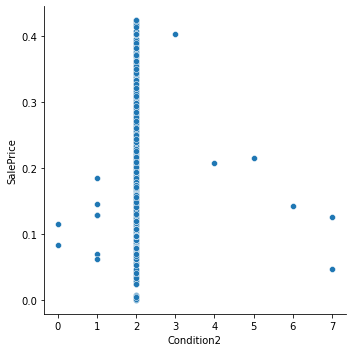

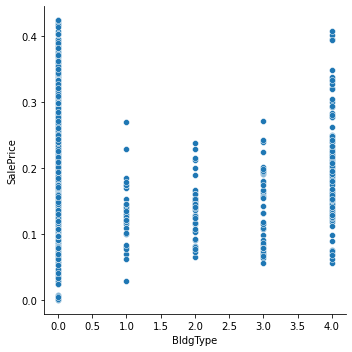

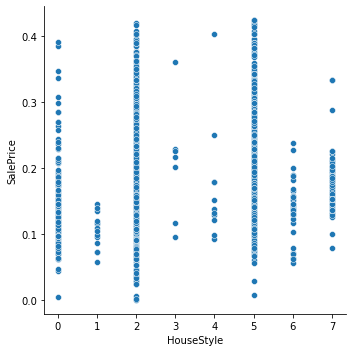

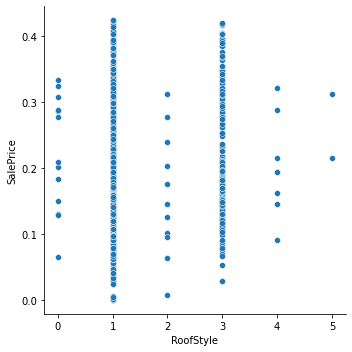

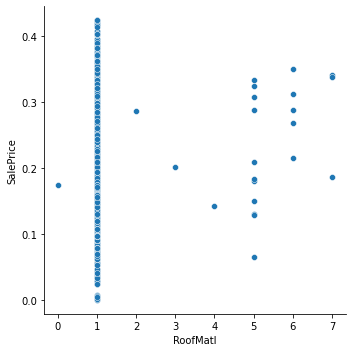

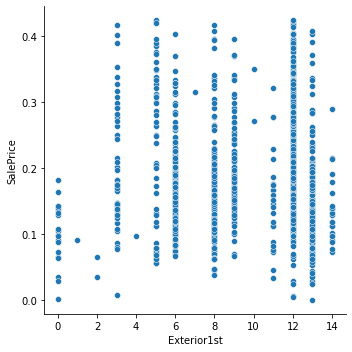

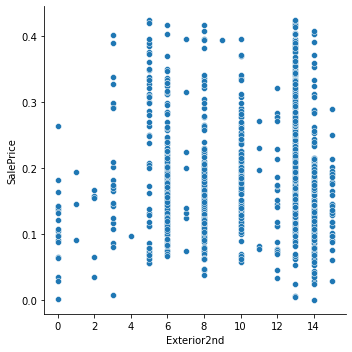

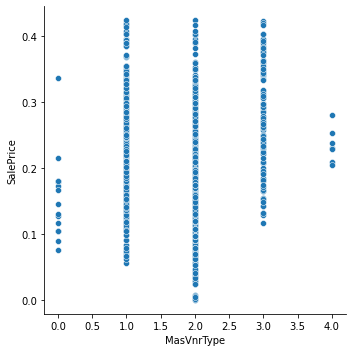

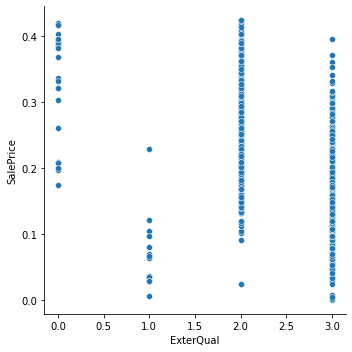

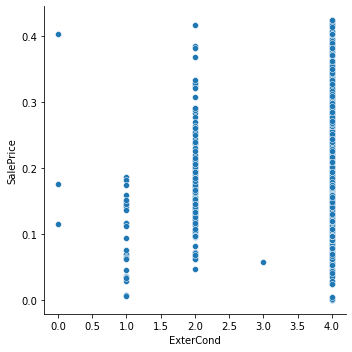

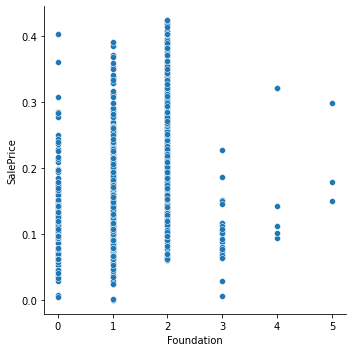

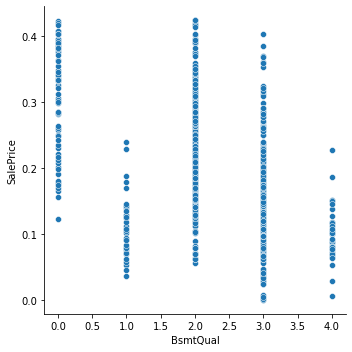

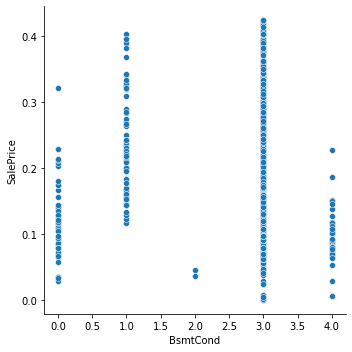

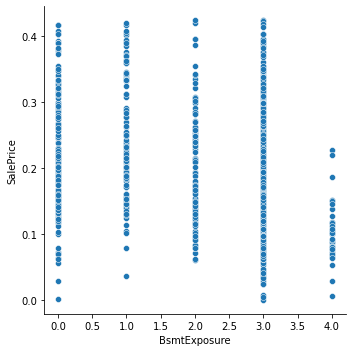

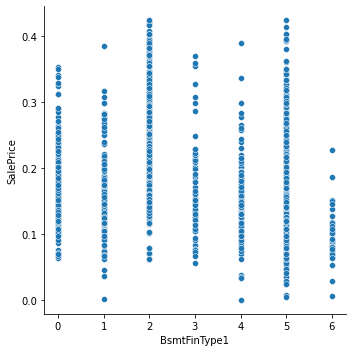

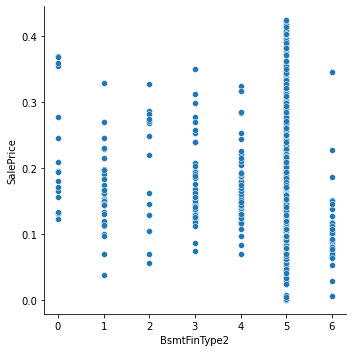

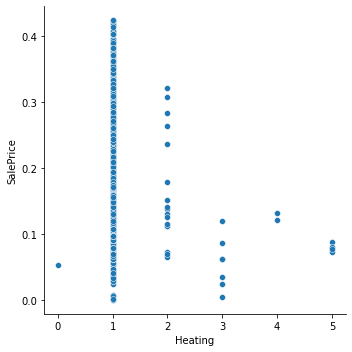

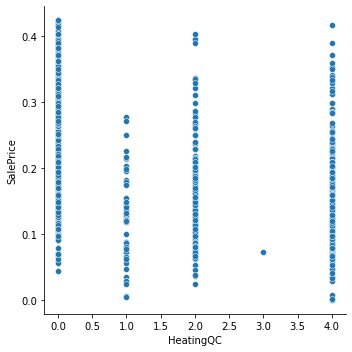

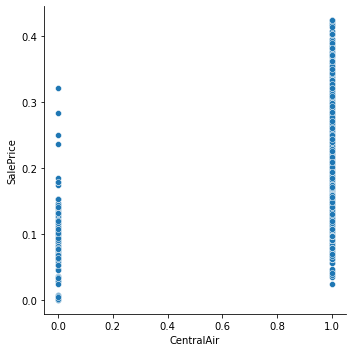

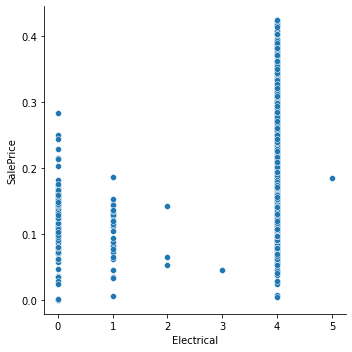

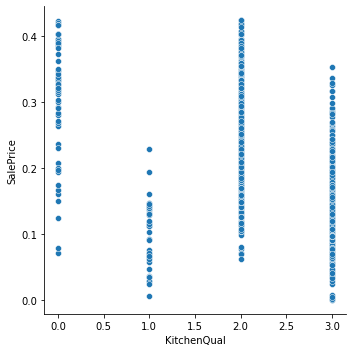

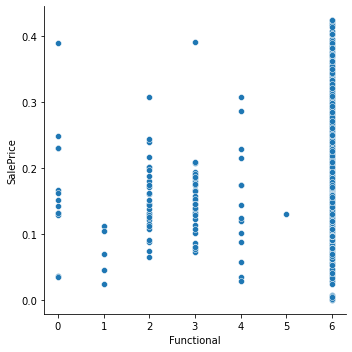

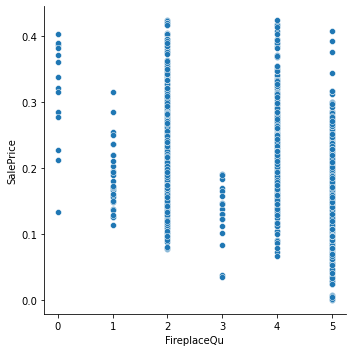

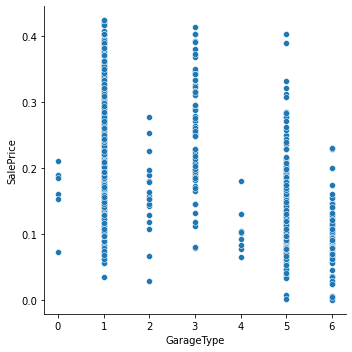

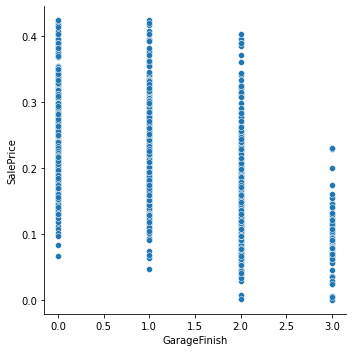

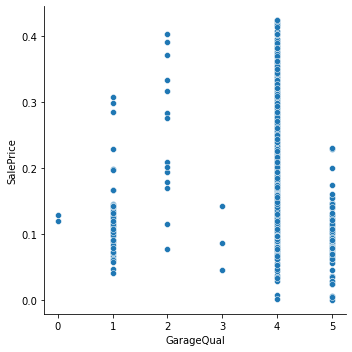

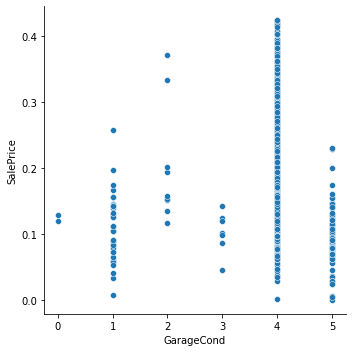

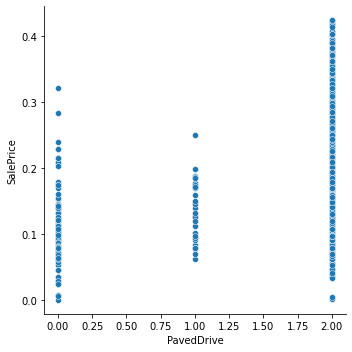

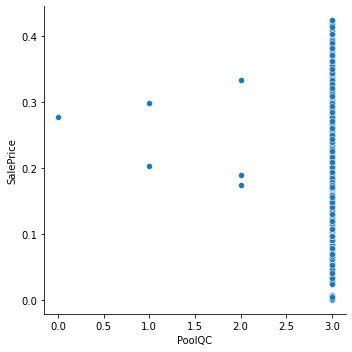

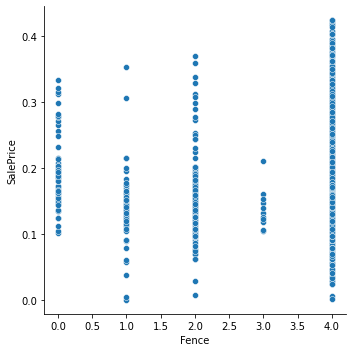

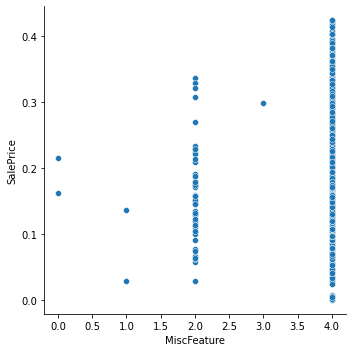

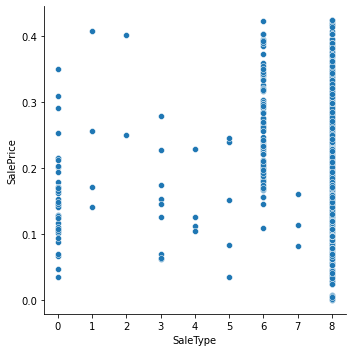

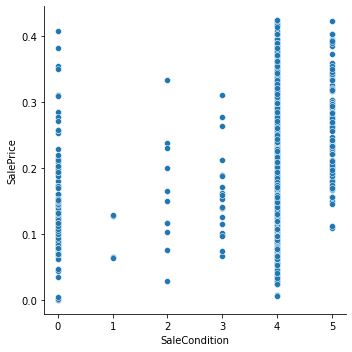

In [33]:
for i in categorical:
    sns.relplot(x =i, y ="SalePrice",
            data = train);

## Plotting numerical features vs Target Variable

C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


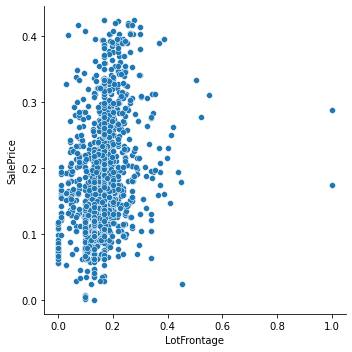

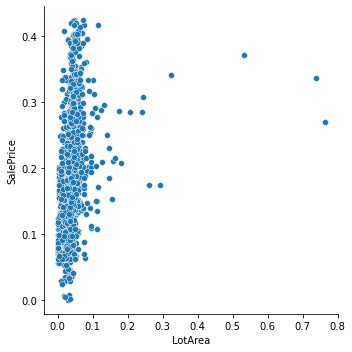

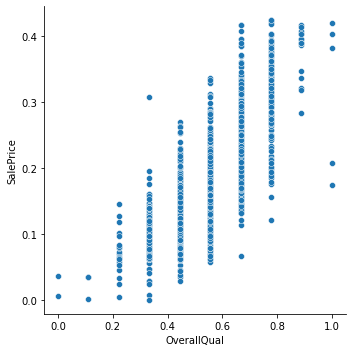

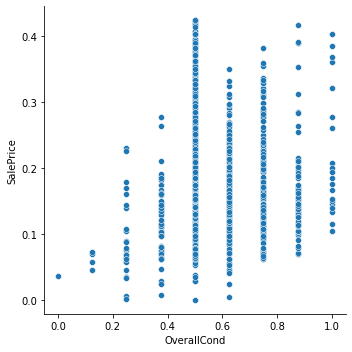

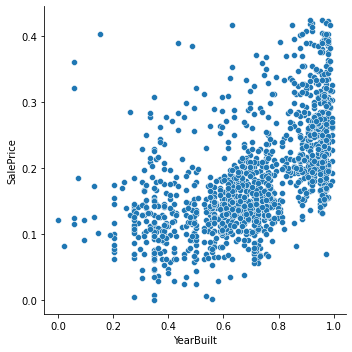

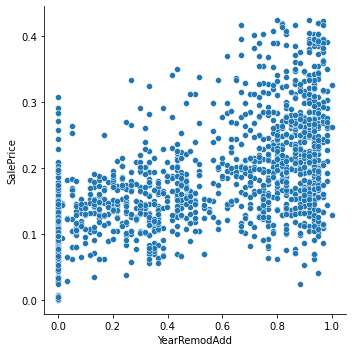

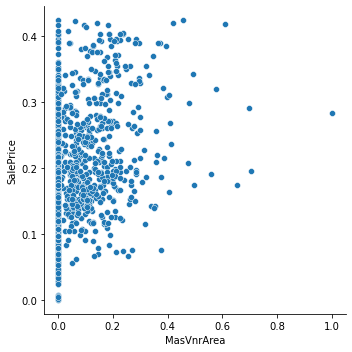

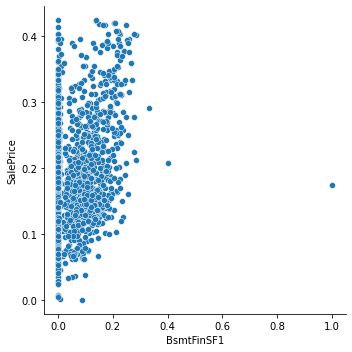

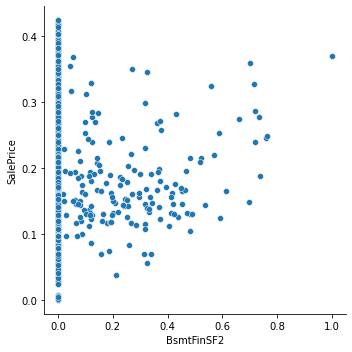

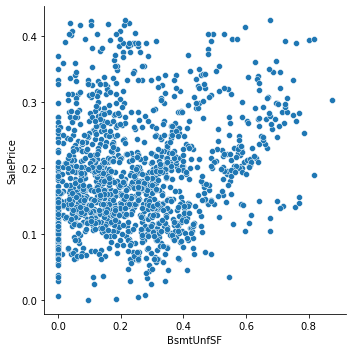

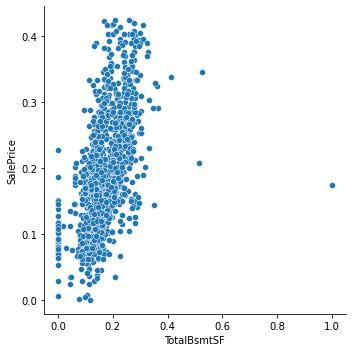

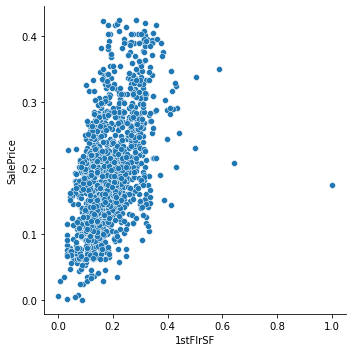

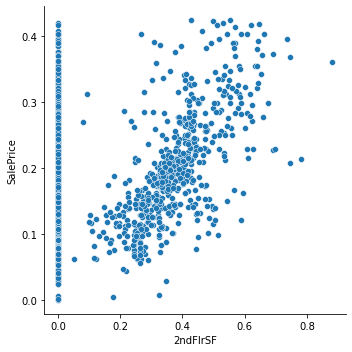

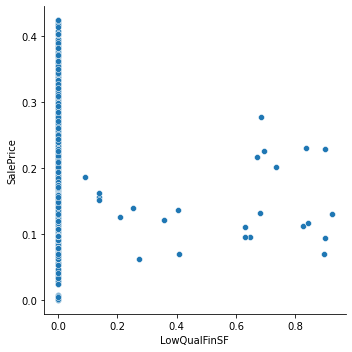

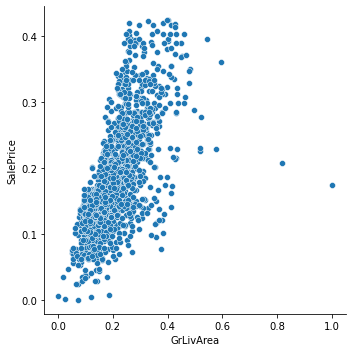

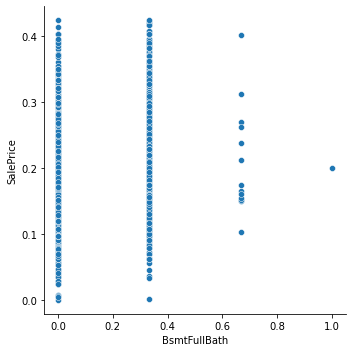

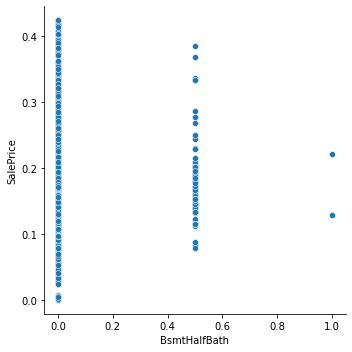

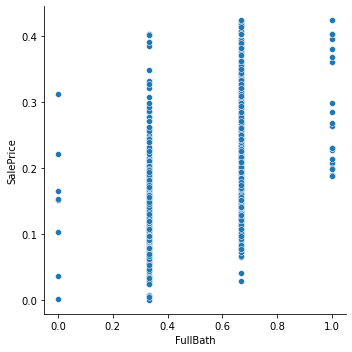

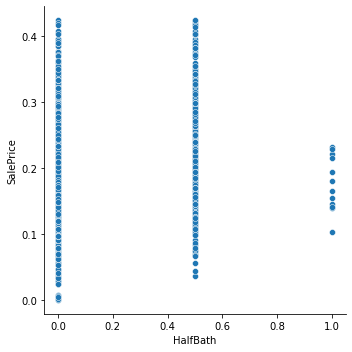

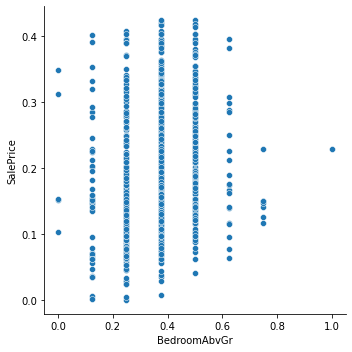

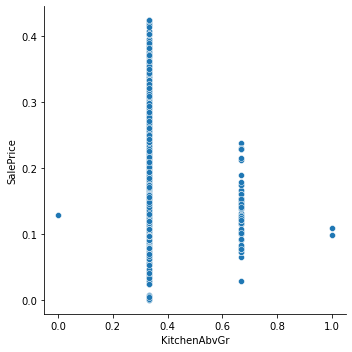

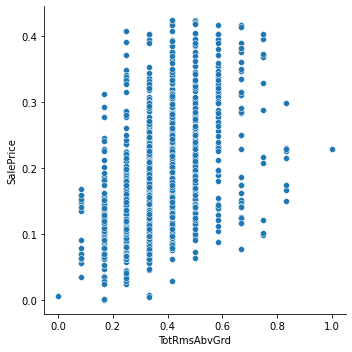

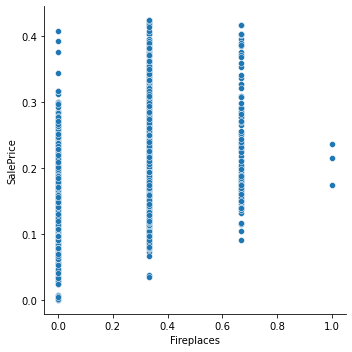

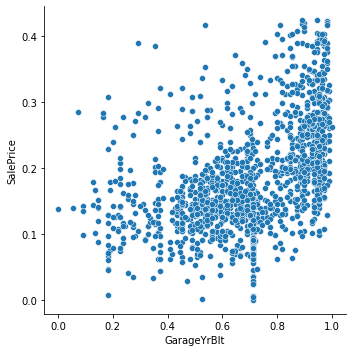

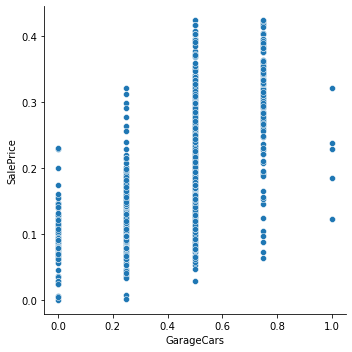

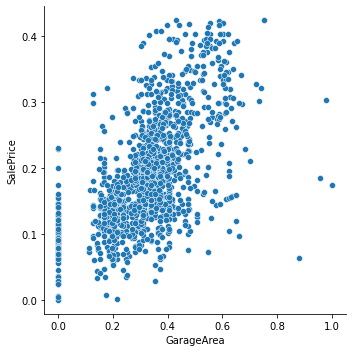

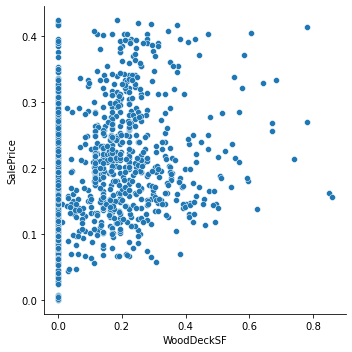

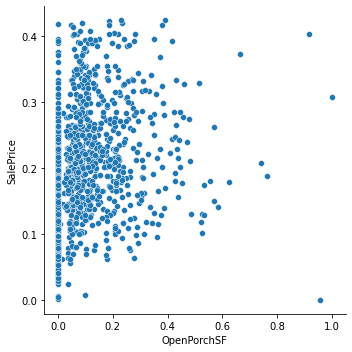

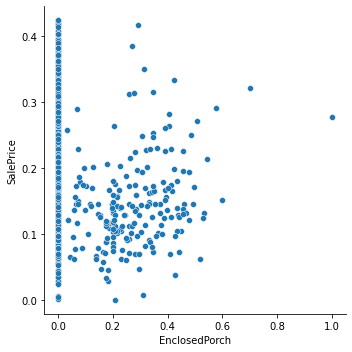

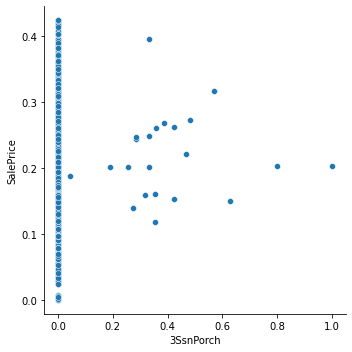

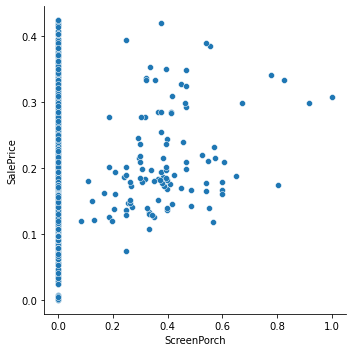

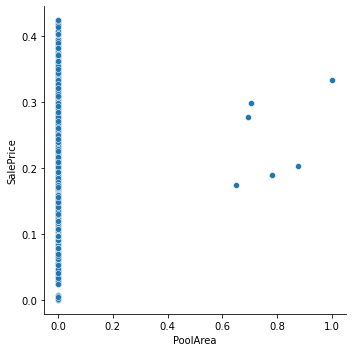

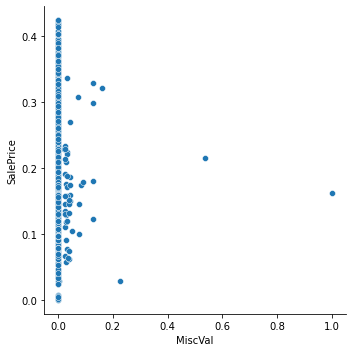

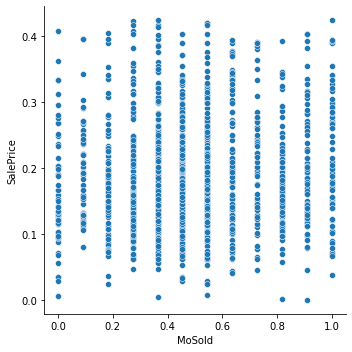

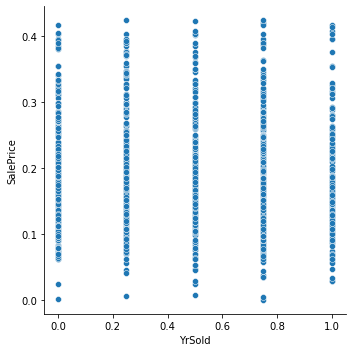

In [34]:
for i in numerical[:-1]:
    sns.relplot(x =i, y ="SalePrice",
            data = train);

## The test.csv is missing the sale price for the houses, and so I split the training.csv data into training and testing parts

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=42)

# Building The Model

In [36]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [37]:
ypred =  lrm.predict(X_test)
#test set: R squared
lrm.score(X_test,y_test)

0.8571742573626233

## mean squared error

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ypred)
mse

0.000876111956239334

## mean absolute error

In [39]:
from sklearn.metrics import mean_absolute_error
import numpy as np


In [40]:
from sklearn import metrics
metrics.mean_absolute_error(ypred,y_test)

0.021227329956882406

# root mean squared error (RMSE): 

In [41]:
from sklearn.metrics import mean_squared_error

rms = np.sqrt(metrics.mean_squared_error(y_test,ypred))
rms

0.02959918843886322

# part 2

In [42]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [43]:
model1 = Ridge(alpha=1.0)
model1.fit(X_train,y_train)
yridge=model1.predict(X_test)
model1.score(X_test,y_test)

0.8549897496615408

In [44]:
#MSE
mse2 = mean_squared_error(y_test, yridge)
mse2

0.0008895120148007265

In [45]:
# MAE
metrics.mean_absolute_error(y_test,yridge)

0.021419984485211867

In [46]:
#RMSE
rms2 = np.sqrt(metrics.mean_squared_error(y_test,yridge))
rms2

0.029824688008439022

## Lasso Regression

In [47]:
model2 = Lasso(alpha=1.0)
model2.fit(X_train,y_train)
ylasso=model2.predict(X_test)
model2.score(X_test,y_test)

-0.009463632244312237

In [48]:
mse3 = mean_squared_error(y_test, ylasso)
mse3

0.006192183154569398

In [49]:
#MAE
metrics.mean_absolute_error(ylasso,y_test)

0.062106839765772213

In [50]:
rms3 = np.sqrt(metrics.mean_squared_error(y_test,ylasso))
rms3

0.07869042606676747

## Elastic Net

In [51]:
model3 = ElasticNet(alpha=1.0, l1_ratio=0.5)
model3.fit(X_train,y_train)
yelastic=model3.predict(X_test)
model3.score(X_test,y_test)

-0.009463632244312237

In [52]:
# MSE
mse4 = mean_squared_error(y_test, yelastic)
mse4

0.006192183154569398

In [53]:
# Mean absolute error
mae4 = metrics.mean_absolute_error(yelastic,y_test)
mae4

0.062106839765772213

In [54]:
#RMSE
rms4 = np.sqrt(metrics.mean_squared_error(y_test,yelastic))
rms4

0.07869042606676747

# testing on Testing.csv

In [55]:
testdata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,0.329609,0.184147,1,2,3,3,0,4,...,0.208333,0.0,1,2,3,0.0,0.454545,1.0,8,4
1,0,3,0.335196,0.232124,1,2,0,3,0,0,...,0.000000,0.0,1,4,0,1.0,0.454545,1.0,8,4
2,5,3,0.296089,0.224197,1,2,0,3,0,4,...,0.000000,0.0,1,2,3,0.0,0.181818,1.0,8,4
3,5,3,0.318436,0.154326,1,2,0,3,0,4,...,0.000000,0.0,1,4,3,0.0,0.454545,1.0,8,4
4,11,3,0.122905,0.064121,1,2,0,1,0,4,...,0.250000,0.0,1,4,3,0.0,0.000000,1.0,8,4


In [56]:
#Linear Regression: saving and creating CSV for the houses in test.csv with the prediction houseprice
lineardata= testdata.copy()
lineardata["SalePrice"]=lrm.predict(testdata)
lineardata.to_csv('Linear-regression.csv',index=False)
lineardata.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,2,0.329609,0.184147,1,2,3,3,0,4,...,0.0,1,2,3,0.0,0.454545,1.0,8,4,0.140338
1,0,3,0.335196,0.232124,1,2,0,3,0,0,...,0.0,1,4,0,1.0,0.454545,1.0,8,4,0.237153
2,5,3,0.296089,0.224197,1,2,0,3,0,4,...,0.0,1,2,3,0.0,0.181818,1.0,8,4,0.248954
3,5,3,0.318436,0.154326,1,2,0,3,0,4,...,0.0,1,4,3,0.0,0.454545,1.0,8,4,0.280574
4,11,3,0.122905,0.064121,1,2,0,1,0,4,...,0.0,1,4,3,0.0,0.000000,1.0,8,4,0.259477


In [57]:
#Ridge regression:model1.predict(testdata)
ridgedata= testdata.copy()
ridgedata["SalePrice"]=model1.predict(testdata)
ridgedata.to_csv('lasso-regression.csv',index=True)
ridgedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,2,0.329609,0.184147,1,2,3,3,0,4,...,0.0,1,2,3,0.0,0.454545,1.0,8,4,0.106487
1,0,3,0.335196,0.232124,1,2,0,3,0,0,...,0.0,1,4,0,1.0,0.454545,1.0,8,4,0.183423
2,5,3,0.296089,0.224197,1,2,0,3,0,4,...,0.0,1,2,3,0.0,0.181818,1.0,8,4,0.210526
3,5,3,0.318436,0.154326,1,2,0,3,0,4,...,0.0,1,4,3,0.0,0.454545,1.0,8,4,0.244245
4,11,3,0.122905,0.064121,1,2,0,1,0,4,...,0.0,1,4,3,0.0,0.000000,1.0,8,4,0.218486


In [58]:
#lasso regression:
lassodata= testdata.copy()
lassodata["SalePrice"]=model2.predict(testdata)
lassodata.to_csv('Ridge-regression.csv',index=True)
lassodata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,2,0.329609,0.184147,1,2,3,3,0,4,...,0.0,1,2,3,0.0,0.454545,1.0,8,4,0.189467
1,0,3,0.335196,0.232124,1,2,0,3,0,0,...,0.0,1,4,0,1.0,0.454545,1.0,8,4,0.189467
2,5,3,0.296089,0.224197,1,2,0,3,0,4,...,0.0,1,2,3,0.0,0.181818,1.0,8,4,0.189467
3,5,3,0.318436,0.154326,1,2,0,3,0,4,...,0.0,1,4,3,0.0,0.454545,1.0,8,4,0.189467
4,11,3,0.122905,0.064121,1,2,0,1,0,4,...,0.0,1,4,3,0.0,0.000000,1.0,8,4,0.189467


In [59]:
#elastic net regression:
elasticdata= testdata.copy()
elasticdata["SalePrice"]=model3.predict(testdata)
elasticdata.to_csv('Elastic-regression.csv',index=True)
elasticdata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,2,0.329609,0.184147,1,2,3,3,0,4,...,0.0,1,2,3,0.0,0.454545,1.0,8,4,0.189467
1,0,3,0.335196,0.232124,1,2,0,3,0,0,...,0.0,1,4,0,1.0,0.454545,1.0,8,4,0.189467
2,5,3,0.296089,0.224197,1,2,0,3,0,4,...,0.0,1,2,3,0.0,0.181818,1.0,8,4,0.189467
3,5,3,0.318436,0.154326,1,2,0,3,0,4,...,0.0,1,4,3,0.0,0.454545,1.0,8,4,0.189467
4,11,3,0.122905,0.064121,1,2,0,1,0,4,...,0.0,1,4,3,0.0,0.000000,1.0,8,4,0.189467


# Describtive statistics for some of the features:

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1399 non-null   int64  
 1   MSZoning       1399 non-null   int64  
 2   LotFrontage    1399 non-null   float64
 3   LotArea        1399 non-null   float64
 4   Street         1399 non-null   int64  
 5   Alley          1399 non-null   int64  
 6   LotShape       1399 non-null   int64  
 7   LandContour    1399 non-null   int64  
 8   Utilities      1399 non-null   int64  
 9   LotConfig      1399 non-null   int64  
 10  LandSlope      1399 non-null   int64  
 11  Neighborhood   1399 non-null   int64  
 12  Condition1     1399 non-null   int64  
 13  Condition2     1399 non-null   int64  
 14  BldgType       1399 non-null   int64  
 15  HouseStyle     1399 non-null   int64  
 16  OverallQual    1399 non-null   float64
 17  OverallCond    1399 non-null   float64
 18  YearBuil

In [61]:
train['MSSubClass'].describe()

count    1399.000000
mean        4.222302
std         4.197201
min         0.000000
25%         0.000000
50%         4.000000
75%         6.000000
max        14.000000
Name: MSSubClass, dtype: float64

In [62]:
# the covariance between this feature and the target variable
train['MSSubClass'].cov(train['SalePrice'])

-0.007850589192222587

In [63]:
train['OverallQual'].describe()

count    1399.000000
mean        0.553729
std         0.142475
min         0.000000
25%         0.444444
50%         0.555556
75%         0.666667
max         1.000000
Name: OverallQual, dtype: float64

In [64]:
# the covariance between this feature and the target variable
train['OverallQual'].cov(train['SalePrice'])

0.00919108147305527

In [65]:
train['OverallCond'].describe()

count    1399.000000
mean        0.573892
std         0.139779
min         0.000000
25%         0.500000
50%         0.500000
75%         0.625000
max         1.000000
Name: OverallCond, dtype: float64

In [66]:
# the covariance between this feature and the target variable
train['OverallCond'].cov(train['SalePrice'])

-0.0005519295849544279

In [67]:
train['GrLivArea'].describe()

count    1399.000000
mean        0.214848
std         0.090534
min         0.000000
25%         0.147890
50%         0.207800
75%         0.262622
max         1.000000
Name: GrLivArea, dtype: float64

In [68]:
# the covariance between this feature and the target variable
train['GrLivArea'].cov(train['SalePrice'])

0.00492463896122213

In [69]:
train['WoodDeckSF'].describe()

count    1399.000000
mean        0.104575
std         0.142122
min         0.000000
25%         0.000000
50%         0.000000
75%         0.192532
max         0.858810
Name: WoodDeckSF, dtype: float64

In [70]:
# the covariance between this feature and the target variable
train['WoodDeckSF'].cov(train['SalePrice'])

0.0035343080117173804

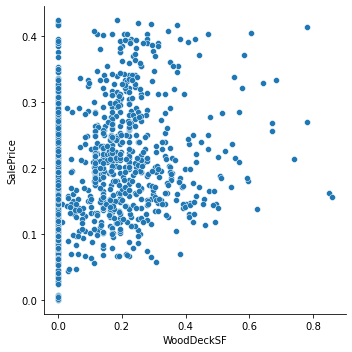

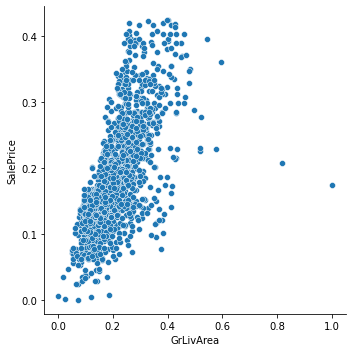

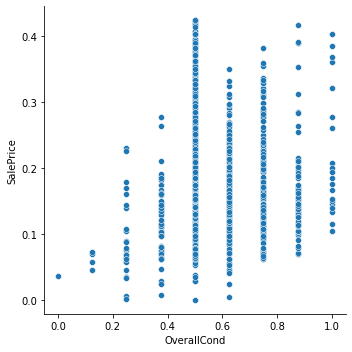

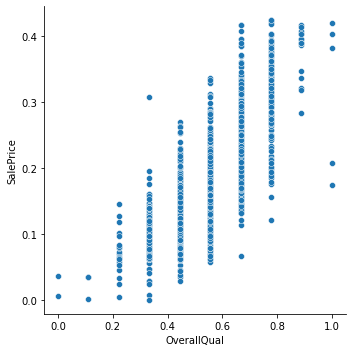

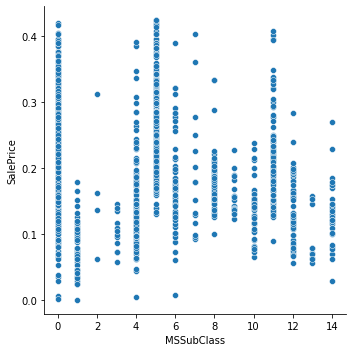

In [71]:
special_features =['WoodDeckSF','GrLivArea','OverallCond','OverallQual','MSSubClass']
for i in special_features:
    sns.relplot(x =i, y ="SalePrice",
            data = train);

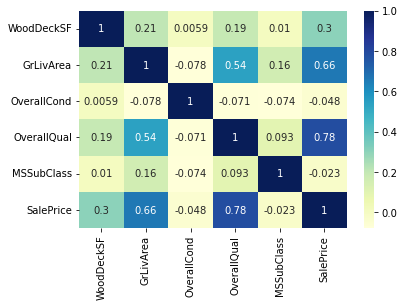

In [72]:
# Visualizing the correlation between features using heatmap
import seaborn as sns
corr_features =['WoodDeckSF','GrLivArea','OverallCond','OverallQual','MSSubClass','SalePrice']
sns.heatmap(train[corr_features].corr(), cmap="YlGnBu", annot = True)
plt.show()